<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/minor_refactor/examples/crime_sim_poisson_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# notebook for import our crime sim module and running some tests

## Notes on running

For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [3]:
%cd ~/

! git clone --single-branch --branch minor_refactor https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (243/243), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 243 (delta 130), reused 185 (delta 76), pack-reused 0
Receiving objects: 100% (243/243), 19.67 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [4]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 215kB 7.1MB/s 
     |████████████████████████████████| 92kB 26.6MB/s 
     |████████████████████████████████| 13.1MB 41.8MB/s 
     |████████████████████████████████| 20.4MB 34.7MB/s 
     |████████████████████████████████| 10.5MB 37.7MB/s 
     |████████████████████████████████| 235kB 43.4MB/s 
     |████████████████████████████████| 512kB 44.6MB/s 
     |████████████████████████████████| 61kB 22.0MB/s 
     |████████████████████████████████| 153kB 47.7MB/s 
ERROR: kaggle 1.5.5 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.3 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 4.5.4 which is incompatible.
ERROR: datascience 0

# RESTART RUNTIME

In [2]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit
zip_safe flag not set; analyzing archive contents...


In [44]:
import crime_sim_toolkit.poisson_sim as Poisson_sim
import os
import sys


sim1 = Poisson_sim.Poisson_sim(LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], timeframe='Day')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  0
No files found in data folder.
Defaulting to test data.
Psuedo days allocated to all reports.


In [45]:
sim1.data.head()

,Counts,Crime_type,Day,LSOA_code,Mon,Year
0,1,Anti-social behaviour,6,E01010568,7,2016
1,3,Anti-social behaviour,31,E01010569,7,2016
2,2,Anti-social behaviour,9,E01010569,7,2016
3,2,Anti-social behaviour,13,E01010569,7,2016
4,2,Anti-social behaviour,14,E01010569,7,2016


In [46]:
test_data = sim1.out_of_bag_prep(sim1.data)

train_data = sim1.oob_train_split(sim1.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [47]:
%%time

datat = sim1.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 7 Day: 1
Month: 7 Day: 2
Month: 7 Day: 3
Month: 7 Day: 4
Month: 7 Day: 5
Month: 7 Day: 6
Month: 7 Day: 7
Month: 7 Day: 8
Month: 7 Day: 9
Month: 7 Day: 10
Month: 7 Day: 11
Month: 7 Day: 12
Month: 7 Day: 13
Month: 7 Day: 14
Month: 7 Day: 15
Month: 7 Day: 16
Month: 7 Day: 17
Month: 7 Day: 18
Month: 7 Day: 19
Month: 7 Day: 20
Month: 7 Day: 21
Month: 7 Day: 22
Month: 7 Day: 23
Month: 7 Day: 24
Month: 7 Day: 25
Month: 7 Day: 26
Month: 7 Day: 27
Month: 7 Day: 28
Month: 7 Day: 29
Month: 7 Day: 30
Month: 7 Day: 31
CPU times: user 17min 32s, sys: 11.1 s, total: 17min 43s
Wall time: 17min 25s


In [48]:
datat.head()

,Day,Mon,Crime type,Counts,LSOA_code
0,1,7,Anti-social behaviour,0,E01010573
1,1,7,Anti-social behaviour,1,E01010578
2,1,7,Anti-social behaviour,0,E01010598
3,1,7,Anti-social behaviour,1,E01010609
4,1,7,Anti-social behaviour,2,E01010610


Root mean squared error of poisson sampler:  1.2
Mean absolute error:  0.7
Median absolute error:  0.0


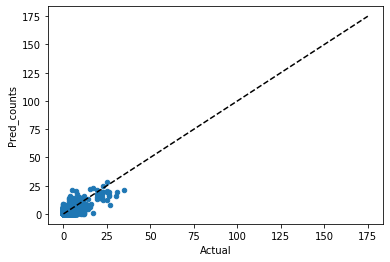

In [49]:
diff_table = sim1.error_Reporting(test_data=test_data, simulated_data=datat)

In [50]:
diff_table.head()

,Day,Pred_counts,Actual,Difference
LSOA_code,,,,
E01010568,1,0,0,0
E01010569,1,0,1,1
E01010570,1,0,0,0
E01010571,1,0,3,3
E01010572,1,0,0,0


In [0]:
from crime_sim_toolkit import utils

In [0]:
# TODO: correct simulated data output so that Crime type --> Crime_type

datat.columns = ['Day','Mon','Crime_type','Counts','LSOA_code']

In [53]:
%%time

synth_counts = utils.counts_to_reports(datat)

CPU times: user 4.87 s, sys: 3.38 ms, total: 4.87 s
Wall time: 4.88 s


In [54]:
synth_counts.head()

,Day,Mon,Crime_type,LSOA_code,UID
0,1,7,Anti-social behaviour,E01010578,E010117A0
1,1,7,Anti-social behaviour,E01010609,E010117A0
2,1,7,Anti-social behaviour,E01010610,E010117A0
3,1,7,Anti-social behaviour,E01010610,E010117A1
4,1,7,Anti-social behaviour,E01010665,E010117A0


In [0]:
synth_counts.to_csv('synthetic_day_reports.csv')

In [0]:
from google.colab import files

files.download('synthetic_day_reports.csv')

In [0]:
# big undersampling evident from comparing size of synthetic counts frame and counts in test data

In [14]:
synth_counts.shape

(7653, 5)

In [16]:
test_data.Counts.sum()

30739

## Example with Week timeframe dimension

In [27]:
import crime_sim_toolkit.poisson_sim as Poisson_sim
import os
import sys


sim1 = Poisson_sim.Poisson_sim(LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], timeframe='Week')

Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  0
No files found in data folder.
Defaulting to test data.
Psuedo days allocated to all reports.
Week numbers allocated.


In [28]:
test_data = sim1.out_of_bag_prep(sim1.data)

train_data = sim1.oob_train_split(sim1.data, test_data)


The passed data does not appear to have a full years (Jan-Dec) worth of data.
Defaulting to select out-of-bag sample for most recent year.


In [29]:
%%time

datat = sim1.SimplePoission(train_data, test_data)

Beginning sampling.
Month: 7 Week: 26
Month: 7 Week: 27
Month: 7 Week: 28
Month: 7 Week: 29
Month: 7 Week: 30
Month: 7 Week: 31
CPU times: user 3min 20s, sys: 2.07 s, total: 3min 22s
Wall time: 3min 19s


In [0]:
datat.columns = ['Week','Mon','Crime_type','Counts','LSOA_code']

Root mean squared error of poisson sampler:  3.6
Mean absolute error:  2.4
Median absolute error:  2.0


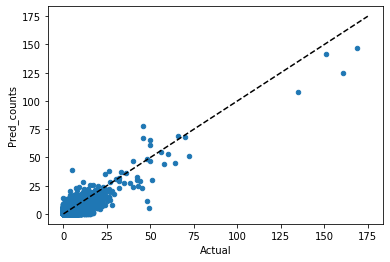

In [39]:
diff_table = sim1.error_Reporting(test_data=test_data, simulated_data=datat)

In [40]:
%%time

synth_counts = utils.counts_to_reports(datat)

CPU times: user 12.5 s, sys: 5.4 ms, total: 12.5 s
Wall time: 12.5 s


In [41]:
synth_counts.head()

,Week,Mon,Crime_type,LSOA_code,UID
0,26,7,Anti-social behaviour,E01010575,E0101267A0
1,26,7,Anti-social behaviour,E01010575,E0101267A1
2,26,7,Anti-social behaviour,E01010578,E0101267A0
3,26,7,Anti-social behaviour,E01010582,E0101267A0
4,26,7,Anti-social behaviour,E01010582,E0101267A1


In [42]:
synth_counts.shape

(20389, 5)

In [43]:
test_data.Counts.sum()

30739

In [0]:
# undersamples but not as significantly as Day sampler